In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
import copy

Nota: quello che dovremo fare è anche capire come trattare gli outlier. Quello che il prof aveva proposto è vedere tra i vari metodi, quali sono i dati che vengono considerati come outlier da tutti (o dalla maggior parte) i metodi e quelli che sono sempre outlier eliminarli. Quelli che invece sono outlier solo per alcuni metodi capire come trattarli, magari lasciarli. <br/>
Per fare poi imbalanced learning si potrebbe usare o il dataset completo oppure quello senza outlier. Vedere. 

## Da mettere nel report: 
- Identify the top 1% outlier. Adopt at least three different methods from three different families and compare the results. The possible families are: Statistical approaches; depth-based; deviation-based; distance-based; density-based; clustering-based; model-based; high-dimensional
- Visualize the outliers in a 2 or 3d scatter plot using at least one dimensionality reduction technique
- Deal with outliers the way you see fit (e.g. removing them or by treating the anomalous values as missing values and applying replacement techniques)

### Importo il dataset e faccio la normalizzazione

Io per ora faccio con il dataset che abbiamo ripulito, quindi quello che ottenevamo prima di fare dimensionality reduction, perchè mi sembra la cosa più simile a quello che fa il prof nel suo procedimento. Ovviamente poi vediamo se fare anche/ solo con il dataset ridotto, ma almeno abbiamo il codice e io provo a farlo

In [3]:
# caricamento del dataset
df = pd.read_csv("../Datasets/ravdess_features_dm2/InitialPreProcessedDataSet.csv", skipinitialspace=True)
df = df.drop(['Unnamed: 0'],axis=1)
df

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_count,sum,std,q25,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,M,158558,0.145081,0.004001,-0.000031,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,M,160160,0.114319,0.004283,-0.000031,...,-0.096686,-1.100390,705.975006,0.744699,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,M,156956,0.149963,0.005084,0.000000,...,16.082550,-3.120218,694.365924,0.751478,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,M,152152,0.139618,0.004886,-0.000031,...,-0.332682,-0.880988,663.205667,0.736895,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,M,169769,0.137665,0.002956,-0.000031,...,0.054656,-1.071109,741.412796,0.744390,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,speech,surprised,normal,Dogs are sitting by the door,2nd,F,168168,-0.154480,0.005399,0.000000,...,0.904699,-1.472070,660.790616,0.663444,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814
1824,speech,surprised,strong,Kids are talking by the door,1st,F,174575,-0.139679,0.008788,-0.000031,...,0.947101,-1.301303,634.120979,0.614458,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583
1825,speech,surprised,strong,Kids are talking by the door,2nd,F,169770,-0.210968,0.009933,0.000000,...,2.505409,-1.472613,631.801688,0.634339,0.288322,0.000000,0.891486,1.0,-0.656632,-0.586954
1826,speech,surprised,strong,Dogs are sitting by the door,1st,F,185786,-0.085876,0.012221,-0.000031,...,-0.020476,-1.160818,680.117724,0.622818,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045


Gli algoritmi non prendono come input le variabili categoriche, e sarebbe sbagliato fare one-hot encoding, e poi standardizzare, non avrebbe senso, perchè non avrei mai valori che possono dare un outlier score. <br/>
Nel momento in cui ho verificato che non ci sono errori nel dataset, cioè che non ho valori non ammissibili tra i valori delle variabili categoriche, hanno già dato tutte le informazioni, ad esempio, che nella colonna sesso ho solo M e F, che ho solo frasi ammissibili etc

In [4]:
#Vado a fare una copia del dataframe e droppo le colonne che hanno tipo categorico

df1=copy.deepcopy(df)

In [5]:
df1.dtypes[df1.dtypes.map(lambda x: x == 'object')] #these are the categorical features

vocal_channel          object
emotion                object
emotional_intensity    object
statement              object
repetition             object
sex                    object
dtype: object

In [6]:
df1 = df1.drop(['vocal_channel','emotion','emotional_intensity','statement','repetition','sex'],axis=1)
df1

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,-0.096686,-1.100390,705.975006,0.744699,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,16.082550,-3.120218,694.365924,0.751478,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,-0.332682,-0.880988,663.205667,0.736895,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.054656,-1.071109,741.412796,0.744390,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.904699,-1.472070,660.790616,0.663444,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.947101,-1.301303,634.120979,0.614458,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583
1825,169770,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,...,2.505409,-1.472613,631.801688,0.634339,0.288322,0.000000,0.891486,1.0,-0.656632,-0.586954
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,-0.020476,-1.160818,680.117724,0.622818,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045


In [7]:
#Normalizzo il dataset
X = df1.values #salvo in X i valori del dataframe
X

array([[ 1.58558000e+05,  1.45080566e-01,  4.00063526e-03, ...,
         1.00000000e+00,  6.74219030e+00, -1.70621500e+00],
       [ 1.60160000e+05,  1.14318848e-01,  4.28334118e-03, ...,
         1.00000000e+00, -7.00420243e-01, -2.01495219e-01],
       [ 1.56956000e+05,  1.49963379e-01,  5.08360509e-03, ...,
         1.00000000e+00,  1.68898567e+00, -1.02477319e+00],
       ...,
       [ 1.69770000e+05, -2.10968018e-01,  9.93321526e-03, ...,
         1.00000000e+00, -6.56631729e-01, -5.86954461e-01],
       [ 1.85786000e+05, -8.58764648e-02,  1.22208885e-02, ...,
         1.00000000e+00, -4.99022442e-01, -8.49044813e-01],
       [ 1.74574000e+05, -1.95312500e-01,  9.65934941e-03, ...,
         1.00000000e+00, -9.62942936e-01, -2.76516568e-01]])

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scl = StandardScaler()
X = scl.fit_transform(X)
X

array([[-1.26544058,  0.01435934, -0.78086225, ...,  0.03605736,
         9.40036023, -3.03500471],
       [-1.20917578,  0.01105308, -0.76706757, ...,  0.03605736,
        -0.1865042 ,  0.43453832],
       [-1.32170538,  0.01488414, -0.72801856, ...,  0.03605736,
         2.8913017 , -1.46375423],
       ...,
       [-0.87165724, -0.02390865, -0.49138103, ...,  0.03605736,
        -0.13009999, -0.4542434 ],
       [-0.30914976, -0.01046385, -0.37975363, ...,  0.03605736,
         0.07291733, -1.05856439],
       [-0.7029331 , -0.022226  , -0.50474436, ...,  0.03605736,
        -0.52466101,  0.26155608]])

### Box Plot

In [10]:
listcolumns=df1.columns
listcolumns 

Index(['frame_count', 'sum', 'std', 'q25', 'q50', 'q75', 'kur', 'skew',
       'lag1_sum', 'lag1_std',
       ...
       'sc_kur_w4', 'sc_skew_w4', 'stft_sum_w4', 'stft_mean_w4', 'stft_std_w4',
       'stft_min_w4', 'stft_q75_w4', 'stft_q95_w4', 'stft_kur_w4',
       'stft_skew_w4'],
      dtype='object', length=232)

In [11]:
#questo farebbe i boxplot di tutte le features del dataframe --too much
#non ha senso farle fare tutte, non ci da informazioni
#for j in listcolumns:
    #boxplot = df1.boxplot(column=[j])
    #plt.show()

### Automatic Boxplots

In [12]:
def is_outlier(x, k=1.5):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers)
    

In [13]:
#la funzione definita così dice quanti outlier ci sono in quella determinata feature,
#ho lasciato la parte che salva anche true o false a seconda di se è o no un outlier

def is_outlier(x, k=1.5):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    count=0
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
            count+=1
        else:
            outliers.append(False)
    return count
    

In [14]:
#Per la colonna specificata dal secondo parametro di X, controlla ogni elemento in ogni riga se è un outlier
#e ritorna il conto 

for i in range(0,len(df1.columns)):
    outliers = is_outlier(X[:,i], k=1.5)
    print(df1.columns[i],'has',outliers,'outliers')
    


frame_count has 14 outliers
sum has 393 outliers
std has 123 outliers
q25 has 178 outliers
q50 has 22 outliers
q75 has 119 outliers
kur has 71 outliers
skew has 25 outliers
lag1_sum has 325 outliers
lag1_std has 139 outliers
lag1_q25 has 156 outliers
lag1_q75 has 170 outliers
lag1_kur has 113 outliers
lag1_skew has 50 outliers
zc_sum has 34 outliers
zc_mean has 26 outliers
zc_q95 has 295 outliers
mfcc_sum has 56 outliers
mfcc_mean has 5 outliers
mfcc_max has 1 outliers
mfcc_q05 has 32 outliers
mfcc_q25 has 0 outliers
mfcc_q50 has 211 outliers
mfcc_q75 has 1 outliers
mfcc_q95 has 9 outliers
mfcc_q99 has 0 outliers
mfcc_kur has 38 outliers
mfcc_skew has 65 outliers
sc_sum has 13 outliers
sc_mean has 3 outliers
sc_std has 6 outliers
sc_min has 0 outliers
sc_max has 189 outliers
sc_q01 has 0 outliers
sc_q05 has 1 outliers
sc_q25 has 44 outliers
sc_q50 has 1 outliers
sc_q75 has 5 outliers
sc_q95 has 15 outliers
sc_q99 has 28 outliers
sc_kur has 113 outliers
sc_skew has 25 outliers
stft_sum 

In [15]:
#qui faccio il programma prima che però stampa solamente se il numero di outlier è sopra una certa soglia,
#se quella feature cioè ha un numero di outlier significativo
#imposto il numero significativo di outlier al 5% del numero di record del dataset: circa 90

for i in range(0,len(df1.columns)):
    outliers = is_outlier(X[:,i], k=1.5)
    if outliers>90:
        print(df1.columns[i],'has',outliers,'outliers')

sum has 393 outliers
std has 123 outliers
q25 has 178 outliers
q75 has 119 outliers
lag1_sum has 325 outliers
lag1_std has 139 outliers
lag1_q25 has 156 outliers
lag1_q75 has 170 outliers
lag1_kur has 113 outliers
zc_q95 has 295 outliers
mfcc_q50 has 211 outliers
sc_max has 189 outliers
sc_kur has 113 outliers
stft_min has 241 outliers
stft_q01 has 195 outliers
stft_q05 has 146 outliers
sum_w1 has 464 outliers
std_w1 has 177 outliers
q05_w1 has 268 outliers
q25_w1 has 122 outliers
q75_w1 has 128 outliers
kur_w1 has 270 outliers
skew_w1 has 275 outliers
lag1_sum_w1 has 734 outliers
lag1_min_w1 has 173 outliers
lag1_q05_w1 has 195 outliers
lag1_kur_w1 has 310 outliers
lag1_skew_w1 has 234 outliers
zc_q99_w1 has 97 outliers
mfcc_kur_w1 has 107 outliers
mfcc_skew_w1 has 146 outliers
sc_max_w1 has 210 outliers
sc_kur_w1 has 151 outliers
stft_min_w1 has 176 outliers
stft_q75_w1 has 131 outliers
stft_q95_w1 has 248 outliers
stft_kur_w1 has 166 outliers
sum_w2 has 332 outliers
q50_w2 has 395 o

Vado a fare il boxplot delle colonne dove sono presenti più outlier

In [16]:
columns=['lag1_sum','sum_w1','lag1_sum_w1','sum_w4','lag1_sum_w4']

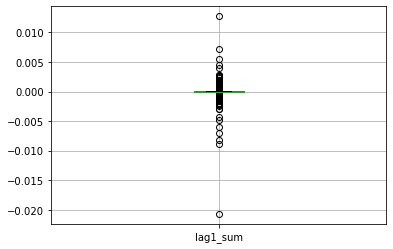

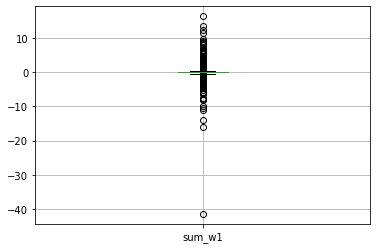

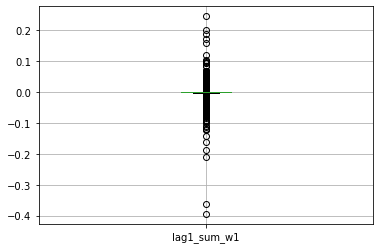

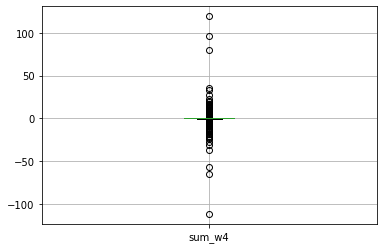

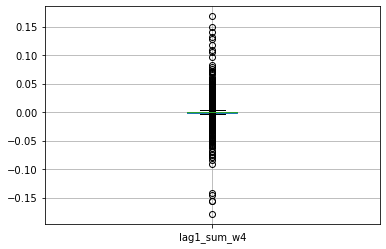

In [17]:
for j in columns:
    boxplot = df1.boxplot(column=[j])
    plt.show()

Bisogna controllare la varianza delle colonne e togliere alcune, perchè probabilmente quelle che sono con così tanti outlier è perchè hanno colonne con magari solo un paio di valori!!

### HBOS

In [52]:
!pip install pyod  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 3.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184095 sha256=e2f84d8be3cee9844ae8cc2235da591c9aa61610318ae4a3cbbb600c4825969b
  Stored in directory: /Users/dilettaferri/Library/Caches/pip/wheels/1b/9c/b8/9759d7cc64a1e01bb9872ade80cb7db445ccf506e083325106
Successfully built pyod


In [18]:
from pyod.models.hbos import HBOS

HBOS: Hisogram Based Outlier Score -- we make the STRONG assumption of feature independence <br/>
It's a GLOBAL and SCORING approach

In [10]:
clf = HBOS()
clf.fit(X)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [11]:
clf.decision_scores_

array([332.38990101, 307.15513695, 305.23056864, ..., 284.624108  ,
       262.30318261, 277.83835516])

In [12]:
outliers_hbos = clf.predict(X)
np.unique(outliers_hbos, return_counts=True)

(array([0, 1]), array([1645,  183]))

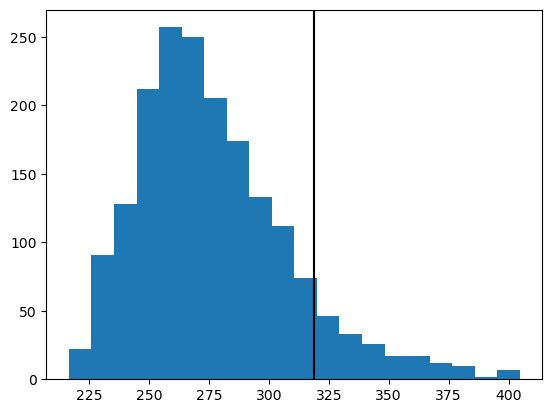

In [13]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_hbos==1)]), c='k')
plt.show()

In [19]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
pca.fit(X)
X_out_hbos_pca = pca.transform(X)

In [16]:
X_out_hbos_pca.shape



(1828, 2)

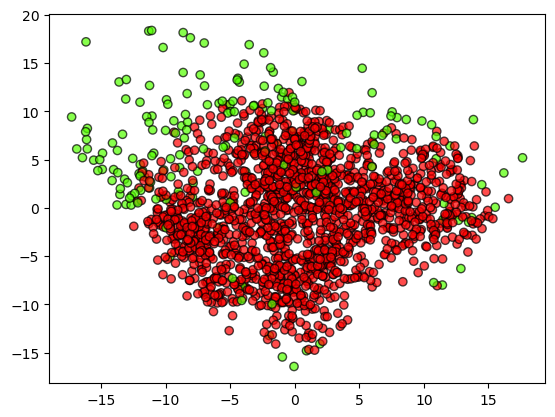

In [20]:
mappacolori=['519331','9E3549']

plt.scatter(X_out_hbos_pca[:, 0], X_out_hbos_pca[:, 1], c=outliers_hbos, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

### Elliptic Envelope

Creates an immaginary elliptical area around a given dataset. Values that fall inside are considered normal, and what's outside is conisddered as an outlier. The algorithm works best if data has a gaussian distribution.

In [10]:
from sklearn.covariance import EllipticEnvelope

In [18]:
ellenv = EllipticEnvelope(random_state=0)
ellenv.fit(X)

/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1538.767479636027019 > -1591.561340911227262). You may want to try with a higher value of support_fraction (current value: 0.565).
  warnings.warn(
/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-1680.884782736718080 > -1682.328579882015447). You may want to try with a higher value of support_fraction (current value: 0.564).
  warnings.warn(
/Users/dilettaferri/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust

EllipticEnvelope(random_state=0)

In [19]:
# predict returns 1 for an inlier and -1 for an outlier
outliers = ellenv.predict(X)

In [20]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 183, 1645]))

The algorithm finds 183 outliers

### kNN

Takes the kNN distance of a point as its outlier score. Note that this approach is particularly sensitive to the parameter k (number of neighbors we are considering)

In [11]:
from pyod.models.knn import KNN

In [33]:
for i in range(2,20):
    clf = KNN(n_neighbors=i)
    clf.fit(X)
    outliers = clf.predict(X)
    print(i, 'number of neighbors', np.unique(outliers, return_counts=True))

2 number of neighbors (array([0, 1]), array([1696,  132]))
3 number of neighbors (array([0, 1]), array([1676,  152]))
4 number of neighbors (array([0, 1]), array([1661,  167]))
5 number of neighbors (array([0, 1]), array([1663,  165]))
6 number of neighbors (array([0, 1]), array([1655,  173]))
7 number of neighbors (array([0, 1]), array([1657,  171]))
8 number of neighbors (array([0, 1]), array([1653,  175]))
9 number of neighbors (array([0, 1]), array([1652,  176]))
10 number of neighbors (array([0, 1]), array([1651,  177]))
11 number of neighbors (array([0, 1]), array([1651,  177]))
12 number of neighbors (array([0, 1]), array([1651,  177]))
13 number of neighbors (array([0, 1]), array([1651,  177]))
14 number of neighbors (array([0, 1]), array([1651,  177]))
15 number of neighbors (array([0, 1]), array([1651,  177]))
16 number of neighbors (array([0, 1]), array([1652,  176]))
17 number of neighbors (array([0, 1]), array([1651,  177]))
18 number of neighbors (array([0, 1]), array([16

The second number of the last parenthesis is the number of outliers that the algorithm finds, which is pretty much stable from k=10 and up

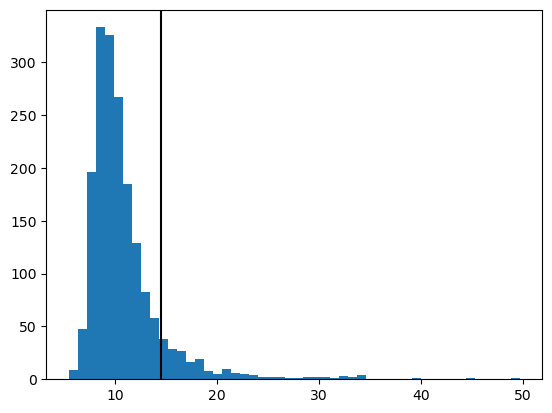

In [27]:
plt.hist(clf.decision_scores_, bins=50)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

### LOF (Local Outlier Factor)

For each point computes the density of its local neighborhood, compute the LOF of a sample p as the average of the rations of the density of sample p and the density of its nearest neighbors. Outliers are points with largest LOF value. If LOF is ≈ 1 the point is in a cluster; if it's >> 1 then it's an outlier 

In [21]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [20]:
from pyod.models.lof import LOF #USO QUESTA LIBRERIA INVECE CHE QUELLA DI SKLEARN

In [21]:
clf = LOF()
clf.fit(X)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [22]:
outliers_lof = clf.predict(X)
np.unique(outliers_lof, return_counts=True)

(array([0, 1]), array([1661,  167]))

Con i parametri di default dell'algoritmo LOF trova 167 outlier 

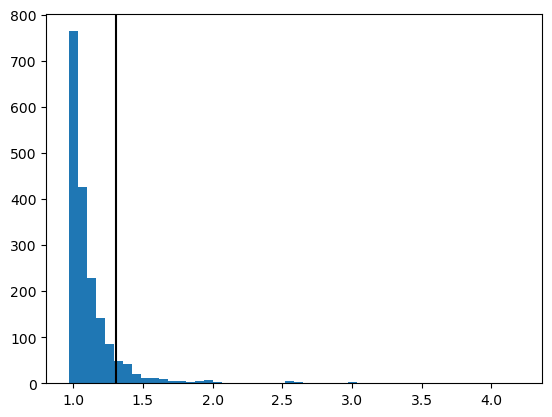

In [23]:
plt.hist(clf.decision_scores_, bins=50)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_lof==1)]), c='k')
plt.show()

In [24]:
pca = PCA(n_components=2)
pca.fit(X)
X_out_lof_pca = pca.transform(X)

print(X_out_lof_pca.shape)


(1828, 2)


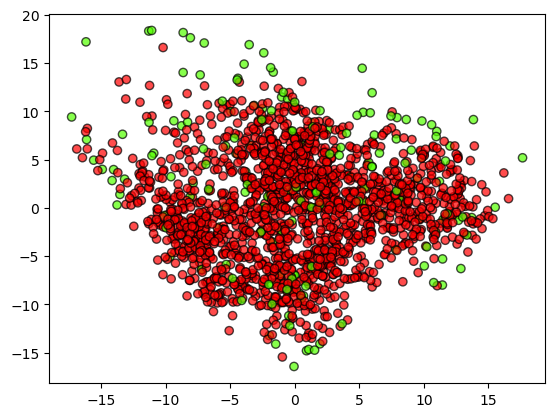

In [25]:
plt.scatter(X_out_lof_pca[:, 0], X_out_lof_pca[:, 1], c=outliers_lof, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [34]:
df_lof=df1.loc[np.where(outliers_lof==1)]
df_lof
#this is the dataframe of all the points considered as outliers from LOF algorithm
#faccio PCA e uso questo per plottare, plottandoli tutti dello stesso colore e con un marker ben definito, 
#così andrò a sovrapporre sullo stesso grafico tutti i punti considerati outlier da ogni algoritmo

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215
8,177778,0.078308,0.002414,-0.000061,0.0,0.000031,10.454705,0.538686,-0.000031,0.000292,...,0.899003,-1.376568,777.537820,0.744768,0.216599,0.000000,0.918358,1.0,0.837659,-1.032183
32,196997,1.193817,0.088973,-0.002808,0.0,0.001801,10.756785,0.474586,0.000824,0.019497,...,1.605771,-1.441124,863.474595,0.741817,0.196000,0.119084,0.900704,1.0,-0.076022,-0.695417
33,209810,0.513947,0.053758,-0.004761,0.0,0.004120,13.823620,0.558830,0.000671,0.012328,...,1.423657,-1.604729,543.759095,0.439935,0.281998,0.032673,0.620003,1.0,-0.677069,0.674907
35,213013,-9.211029,0.149701,-0.004761,0.0,0.002960,9.819674,0.386155,0.000397,0.035097,...,-0.949363,-0.392819,660.978941,0.524586,0.276321,0.035675,0.751114,1.0,-1.098503,0.225204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,177778,0.391052,0.101113,-0.000061,0.0,0.000061,15.381665,0.027705,0.000000,0.021427,...,-0.471636,-0.179456,737.457446,0.706377,0.176425,0.256308,0.832753,1.0,-0.716399,-0.106946
1801,180981,0.072052,0.125725,-0.000061,0.0,0.000061,10.136054,0.050950,0.000000,0.028698,...,3.283671,-1.283071,570.687361,0.534351,0.242829,0.129906,0.704010,1.0,-0.818179,0.518875
1816,229028,-0.043457,0.029479,-0.000122,0.0,0.000153,23.689075,0.122106,0.000000,0.006727,...,0.502336,1.337016,603.573236,0.449087,0.316355,0.002689,0.709292,1.0,-1.152757,0.346435
1818,222622,-0.003540,0.028224,-0.000366,0.0,0.000397,17.369828,0.154518,0.000000,0.010318,...,-1.604578,0.070728,838.771557,0.641263,0.255059,0.045602,0.849066,1.0,-0.950053,-0.356922


In [36]:
X_lof=df_lof.values
X_lof

array([[ 1.58558000e+05,  1.45080566e-01,  4.00063526e-03, ...,
         1.00000000e+00,  6.74219030e+00, -1.70621500e+00],
       [ 1.77778000e+05,  7.83081055e-02,  2.41361103e-03, ...,
         1.00000000e+00,  8.37658981e-01, -1.03218257e+00],
       [ 1.96997000e+05,  1.19381714e+00,  8.89725338e-02, ...,
         1.00000000e+00, -7.60217626e-02, -6.95416630e-01],
       ...,
       [ 2.29028000e+05, -4.34570312e-02,  2.94786636e-02, ...,
         1.00000000e+00, -1.15275700e+00,  3.46434524e-01],
       [ 2.22622000e+05, -3.54003906e-03,  2.82240015e-02, ...,
         1.00000000e+00, -9.50052970e-01, -3.56921772e-01],
       [ 2.19419000e+05, -4.02526855e-02,  3.71525497e-02, ...,
         1.00000000e+00, -7.57745487e-01, -5.12021752e-01]])

In [37]:
#standardizzo i valori presi dal dataframe
scl = StandardScaler()
X_lof = scl.fit_transform(X_lof)
X_lof

array([[-1.09656518, -0.02108106, -0.86257972, ...,  0.12007429,
         4.74413967, -1.76829443],
       [-0.46416747, -0.02340537, -0.91014578, ...,  0.12007429,
         0.62458881, -0.84027987],
       [ 0.16819733,  0.01542488,  1.68418603, ...,  0.12007429,
        -0.01287996, -0.37661715],
       ...,
       [ 1.22211673, -0.02764395, -0.09895585, ...,  0.12007429,
        -0.76411073,  1.05781392],
       [ 1.01133943, -0.02625446, -0.1365604 , ...,  0.12007429,
        -0.62268552,  0.08942595],
       [ 0.90595078, -0.0275324 ,  0.13104478, ...,  0.12007429,
        -0.48851391, -0.12411725]])

In [38]:
pca = PCA(n_components=2)
pca.fit(X_lof)
X_lof_pca = pca.transform(X_lof)

print(X_lof_pca.shape)

(167, 2)


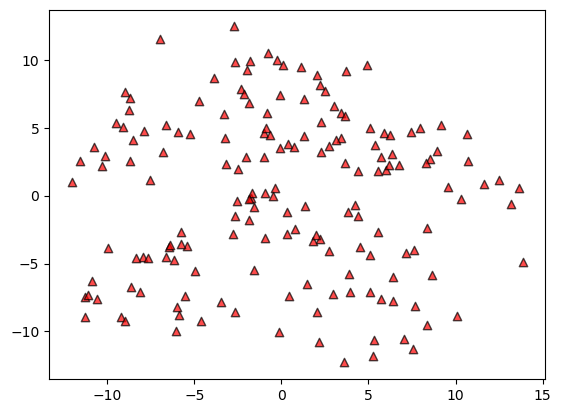

In [48]:
plt.scatter(X_lof_pca[:, 0], X_lof_pca[:, 1], marker='^', color='red', edgecolor='k', alpha=0.7)
plt.show()

### COF

Differs from LOF because it uses the chaining distance to calculate the kNN, and the connectivity is then caclulated differently. It allows to differ between low density and isolation. 

In [14]:
from pyod.models.cof import COF

In [71]:
clf = COF()
clf.fit(X)

COF(contamination=0.1, method='fast', n_neighbors=20)

In [72]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1645,  183]))

Con i parametri di default l'algoritmo trova 183 outliers, quindi leggermente di più di LOF

In [73]:
df_cof=df1.loc[np.where(outliers==1)]
df_cof

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215
32,196997,1.193817,0.088973,-0.002808,0.0,0.001801,10.756785,0.474586,0.000824,0.019497,...,1.605771,-1.441124,863.474595,0.741817,0.196000,0.119084,0.900704,1.0,-0.076022,-0.695417
33,209810,0.513947,0.053758,-0.004761,0.0,0.004120,13.823620,0.558830,0.000671,0.012328,...,1.423657,-1.604729,543.759095,0.439935,0.281998,0.032673,0.620003,1.0,-0.677069,0.674907
34,198598,1.241180,0.056247,-0.001343,0.0,0.001038,13.206908,0.073272,-0.000366,0.016222,...,1.852382,1.229381,667.894096,0.573792,0.254942,0.065927,0.774909,1.0,-1.054539,0.114583
35,213013,-9.211029,0.149701,-0.004761,0.0,0.002960,9.819674,0.386155,0.000397,0.035097,...,-0.949363,-0.392819,660.978941,0.524586,0.276321,0.035675,0.751114,1.0,-1.098503,0.225204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,200200,-0.253113,0.044767,-0.000305,0.0,0.000397,20.170985,0.148770,0.000000,0.007472,...,-1.494379,-0.072332,757.238044,0.643910,0.261324,0.000000,0.861301,1.0,-0.612717,-0.499374
1816,229028,-0.043457,0.029479,-0.000122,0.0,0.000153,23.689075,0.122106,0.000000,0.006727,...,0.502336,1.337016,603.573236,0.449087,0.316355,0.002689,0.709292,1.0,-1.152757,0.346435
1817,214615,-0.107056,0.030653,-0.000061,0.0,0.000153,16.529312,0.125475,0.000000,0.005352,...,0.090746,-1.221061,842.739313,0.668841,0.279030,0.001564,0.877354,1.0,0.047493,-0.962547
1818,222622,-0.003540,0.028224,-0.000366,0.0,0.000397,17.369828,0.154518,0.000000,0.010318,...,-1.604578,0.070728,838.771557,0.641263,0.255059,0.045602,0.849066,1.0,-0.950053,-0.356922


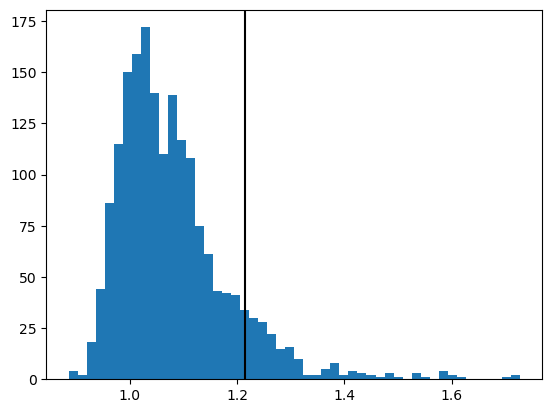

In [42]:
plt.hist(clf.decision_scores_, bins=50)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

### DBSCAN

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=10)

In [11]:
np.unique(dbscan.labels_, return_counts=True) 

(array([-1,  0,  1,  2]), array([ 579, 1219,   27,    3]))

In [12]:
from scipy.spatial.distance import pdist, squareform

In [13]:
dist = pdist(X, 'euclidean') 
dist = squareform(dist)

In [14]:
k=10
kth_distances = []
for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list
kth_distances

[24.730714010323872,
 11.889774576418564,
 13.185482220162491,
 11.259176023545901,
 11.63347329664258,
 12.38537160533014,
 10.336171606721189,
 12.030288810004029,
 22.50884990323726,
 11.454688929947277,
 11.61780270953226,
 11.86406169213274,
 9.72290612100614,
 12.26666074164954,
 10.970922712826841,
 10.821968942118309,
 9.577085996277884,
 11.741055750677495,
 10.846583290408425,
 12.397334356594303,
 10.977084294421465,
 10.758811382520557,
 13.757019279098017,
 12.13467824353435,
 11.474880364931472,
 11.638809494457716,
 10.758811382520557,
 11.002350442413874,
 11.345982221745631,
 10.25570821395818,
 9.456415361063518,
 10.515508028835946,
 17.21662787084687,
 28.172834656898797,
 14.865803007091781,
 22.52576700569551,
 9.988461064731649,
 9.053382024919355,
 9.974152629086941,
 10.623957808825713,
 18.931746643297718,
 14.267305703526574,
 29.45521463434596,
 12.100524348758103,
 12.304059217491616,
 12.310133999148904,
 11.328421572722391,
 10.800818709083343,
 12.482133

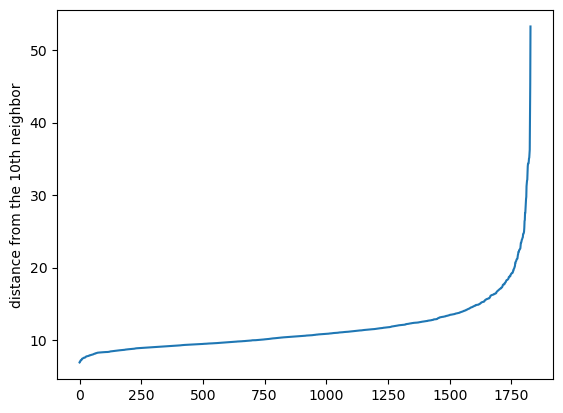

In [15]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
         
plt.show()

Come avevamo fatto per DM1 costruisco il grafico delle distanze dal kesimo vicino, in questo caso ho preso k=10, e vedo che la migliore distanza che posso considerare è circa 15, per tagliare fuori gli outlier ma considerare tutti i punti significativi

In [30]:
dbscan = DBSCAN(eps=15, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=15, min_samples=10)

In [31]:
np.unique(dbscan.labels_, return_counts=True) 

(array([-1,  0]), array([ 118, 1710]))

L'algoritmo di DBscan trova così due classi, una con gli outlier (-1) con 118 punti e un'altra classe con il resto dei punti

In [67]:
df1.loc[np.where(dbscan.labels_==-1)] #così stampo i 118 elementi considerati come outlier

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215
8,177778,0.078308,0.002414,-0.000061,0.0,0.000031,10.454705,0.538686,-0.000031,0.000292,...,0.899003,-1.376568,777.537820,0.744768,0.216599,0.000000,0.918358,1.0,0.837659,-1.032183
32,196997,1.193817,0.088973,-0.002808,0.0,0.001801,10.756785,0.474586,0.000824,0.019497,...,1.605771,-1.441124,863.474595,0.741817,0.196000,0.119084,0.900704,1.0,-0.076022,-0.695417
33,209810,0.513947,0.053758,-0.004761,0.0,0.004120,13.823620,0.558830,0.000671,0.012328,...,1.423657,-1.604729,543.759095,0.439935,0.281998,0.032673,0.620003,1.0,-0.677069,0.674907
35,213013,-9.211029,0.149701,-0.004761,0.0,0.002960,9.819674,0.386155,0.000397,0.035097,...,-0.949363,-0.392819,660.978941,0.524586,0.276321,0.035675,0.751114,1.0,-1.098503,0.225204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,187387,0.001984,0.015051,-0.000153,0.0,0.000122,16.846563,0.260997,0.000000,0.002291,...,-0.317511,-0.851391,757.280654,0.685943,0.229528,0.000000,0.854783,1.0,0.559812,-0.853766
1800,177778,0.391052,0.101113,-0.000061,0.0,0.000061,15.381665,0.027705,0.000000,0.021427,...,-0.471636,-0.179456,737.457446,0.706377,0.176425,0.256308,0.832753,1.0,-0.716399,-0.106946
1801,180981,0.072052,0.125725,-0.000061,0.0,0.000061,10.136054,0.050950,0.000000,0.028698,...,3.283671,-1.283071,570.687361,0.534351,0.242829,0.129906,0.704010,1.0,-0.818179,0.518875
1816,229028,-0.043457,0.029479,-0.000122,0.0,0.000153,23.689075,0.122106,0.000000,0.006727,...,0.502336,1.337016,603.573236,0.449087,0.316355,0.002689,0.709292,1.0,-1.152757,0.346435


### CBLOF (Cluster-Based Local Outlier Factor)

First performs clustering on the dataset, then classifies in small and large clusters. The anomaly score is calculated w.r.t. the size of the cluster the point belongs to as well as the distance to the nearest large cluster (depending on if the point belongs to a small or large cluster, it changes the way the anomaly score is calculated)

In [16]:
from pyod.models.cblof import CBLOF

In [81]:
clf = CBLOF()
clf.fit(X)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [82]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1645,  183]))

Trova di nuovo 183 outlier, la stessa quantità che trovava COF, quindi salvo anche questo in un dataframe e controllo se sono proprio gli stessi che trova il CBLOF

In [83]:
df_cblof=df1.loc[np.where(outliers==1)]
df_cblof

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215
8,177778,0.078308,0.002414,-0.000061,0.0,0.000031,10.454705,0.538686,-0.000031,0.000292,...,0.899003,-1.376568,777.537820,0.744768,0.216599,0.000000,0.918358,1.0,0.837659,-1.032183
33,209810,0.513947,0.053758,-0.004761,0.0,0.004120,13.823620,0.558830,0.000671,0.012328,...,1.423657,-1.604729,543.759095,0.439935,0.281998,0.032673,0.620003,1.0,-0.677069,0.674907
35,213013,-9.211029,0.149701,-0.004761,0.0,0.002960,9.819674,0.386155,0.000397,0.035097,...,-0.949363,-0.392819,660.978941,0.524586,0.276321,0.035675,0.751114,1.0,-1.098503,0.225204
40,240240,-0.239532,0.031093,-0.001160,0.0,0.001007,19.281083,0.252996,-0.000397,0.005075,...,-0.339641,-0.489067,744.565454,0.525823,0.273229,0.056354,0.740017,1.0,-1.072617,0.272193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,172973,-0.354401,0.004586,0.000000,0.0,0.000183,6.076299,-1.044181,0.000000,0.000770,...,3.099530,-1.934066,728.966776,0.714673,0.258178,0.000000,0.911079,1.0,1.078402,-1.264603
1796,187387,0.001984,0.015051,-0.000153,0.0,0.000122,16.846563,0.260997,0.000000,0.002291,...,-0.317511,-0.851391,757.280654,0.685943,0.229528,0.000000,0.854783,1.0,0.559812,-0.853766
1800,177778,0.391052,0.101113,-0.000061,0.0,0.000061,15.381665,0.027705,0.000000,0.021427,...,-0.471636,-0.179456,737.457446,0.706377,0.176425,0.256308,0.832753,1.0,-0.716399,-0.106946
1801,180981,0.072052,0.125725,-0.000061,0.0,0.000061,10.136054,0.050950,0.000000,0.028698,...,3.283671,-1.283071,570.687361,0.534351,0.242829,0.129906,0.704010,1.0,-0.818179,0.518875


La cella successiva chiede di stampare tutte le righe del primo dataframe (outliers di cof) che non sono uguali alle colonne del secondo dataframe (outliers di cblof) --> produce un empty dataframe <br/>
--> Gli outlier di COF e di CBLOF sono gli stessi!

In [78]:
print(df_cof[(df_cof == df_cblof).all(axis=1) == False])
#NOTA: runnandolo di nuovo, otteniamo un errore, perchè ogni volta che l'algoritmo runna considera (a quanto pare)
#elementi diversi come outlier e come non outlier, quindi non sempre corrispondono, ma in alcuni casi come quello 
#iniziale corrispondono. 

Empty DataFrame
Columns: [frame_count, sum, std, q25, q50, q75, kur, skew, lag1_sum, lag1_std, lag1_q25, lag1_q75, lag1_kur, lag1_skew, zc_sum, zc_mean, zc_q95, mfcc_sum, mfcc_mean, mfcc_max, mfcc_q05, mfcc_q25, mfcc_q50, mfcc_q75, mfcc_q95, mfcc_q99, mfcc_kur, mfcc_skew, sc_sum, sc_mean, sc_std, sc_min, sc_max, sc_q01, sc_q05, sc_q25, sc_q50, sc_q75, sc_q95, sc_q99, sc_kur, sc_skew, stft_sum, stft_mean, stft_std, stft_min, stft_q01, stft_q05, stft_q25, stft_q75, stft_kur, sum_w1, std_w1, q05_w1, q25_w1, q50_w1, q75_w1, kur_w1, skew_w1, lag1_sum_w1, lag1_min_w1, lag1_q05_w1, lag1_q25_w1, lag1_kur_w1, lag1_skew_w1, zc_sum_w1, zc_q95_w1, zc_q99_w1, mfcc_sum_w1, mfcc_mean_w1, mfcc_std_w1, mfcc_min_w1, mfcc_max_w1, mfcc_q05_w1, mfcc_q25_w1, mfcc_q50_w1, mfcc_q75_w1, mfcc_q95_w1, mfcc_q99_w1, mfcc_kur_w1, mfcc_skew_w1, sc_sum_w1, sc_mean_w1, sc_std_w1, sc_min_w1, sc_max_w1, sc_q05_w1, sc_q25_w1, sc_q50_w1, sc_q75_w1, sc_q95_w1, sc_kur_w1, sc_skew_w1, stft_sum_w1, stft_mean_w1, stft_std_w1, 

### ABOD (Angle Based Outlier Degree)

ABOD is a high dimensionality approach. ABOD uses angles, that are more stable than distances in high dimensional spaces. An object o is considered an outlier if most other objects are located in similar directions (the variance of the angles is low), and it's not conisdered an outlier if many other objects are located in varying directions, so the variance of the angles is higher. The basc assumption is that outliers are at the border of the data distribution, and normal points are in the center. It measures the variance of the angle spectrum. The algorithm outputs an outlier score. So it's a SCORING and GLOBAL approach. 

In [49]:
from pyod.models.abod import ABOD

In [50]:
clf = ABOD()
clf.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [51]:
outliers_abod = clf.predict(X)
np.unique(outliers_abod, return_counts=True)

(array([0, 1]), array([1601,  227]))

ABOD finds 227 outliers, which is more than the others algorithms

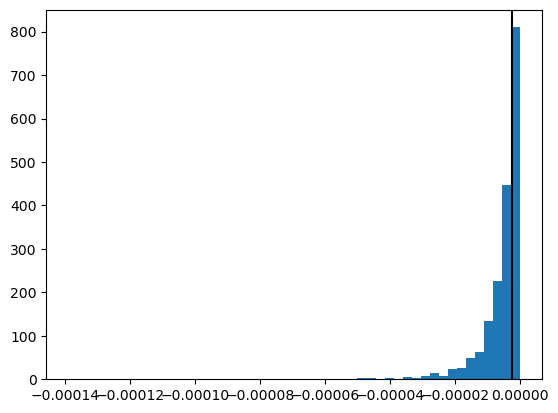

In [52]:
plt.hist(clf.decision_scores_, bins=50)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_abod==1)]), c='k')
plt.show()

In [30]:
pca = PCA(n_components=2)
pca.fit(X)
X_out_abod_pca = pca.transform(X)

print(X_out_abod_pca.shape)


(1828, 2)


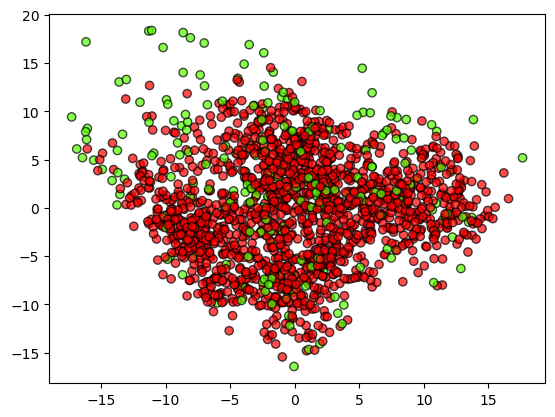

In [31]:
plt.scatter(X_out_abod_pca[:, 0], X_out_abod_pca[:, 1], c=outliers_abod, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [53]:
df_abod=df1.loc[np.where(outliers_abod==1)]
df_abod

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,-0.332682,-0.880988,663.205667,0.736895,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871
8,177778,0.078308,0.002414,-0.000061,0.0,0.000031,10.454705,0.538686,-0.000031,0.000292,...,0.899003,-1.376568,777.537820,0.744768,0.216599,0.000000,0.918358,1.0,0.837659,-1.032183
32,196997,1.193817,0.088973,-0.002808,0.0,0.001801,10.756785,0.474586,0.000824,0.019497,...,1.605771,-1.441124,863.474595,0.741817,0.196000,0.119084,0.900704,1.0,-0.076022,-0.695417
33,209810,0.513947,0.053758,-0.004761,0.0,0.004120,13.823620,0.558830,0.000671,0.012328,...,1.423657,-1.604729,543.759095,0.439935,0.281998,0.032673,0.620003,1.0,-0.677069,0.674907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,206607,-0.033112,0.008515,-0.000092,0.0,0.000122,15.506155,0.192135,0.000000,0.001734,...,-1.180951,0.209738,694.847804,0.573307,0.258681,0.040597,0.781346,1.0,-1.079000,0.062526
1817,214615,-0.107056,0.030653,-0.000061,0.0,0.000153,16.529312,0.125475,0.000000,0.005352,...,0.090746,-1.221061,842.739313,0.668841,0.279030,0.001564,0.877354,1.0,0.047493,-0.962547
1818,222622,-0.003540,0.028224,-0.000366,0.0,0.000397,17.369828,0.154518,0.000000,0.010318,...,-1.604578,0.070728,838.771557,0.641263,0.255059,0.045602,0.849066,1.0,-0.950053,-0.356922
1819,219419,-0.040253,0.037153,-0.000366,0.0,0.000488,21.708608,0.196139,0.000000,0.009914,...,-0.585684,-0.435189,840.733659,0.648714,0.275373,0.000000,0.901568,1.0,-0.757745,-0.512022


In [54]:
X_abod=df_abod.values
X_abod

array([[ 1.58558000e+05,  1.45080566e-01,  4.00063526e-03, ...,
         1.00000000e+00,  6.74219030e+00, -1.70621500e+00],
       [ 1.52152000e+05,  1.39617920e-01,  4.88614704e-03, ...,
         1.00000000e+00, -5.94110682e-01, -4.12870547e-01],
       [ 1.77778000e+05,  7.83081055e-02,  2.41361103e-03, ...,
         1.00000000e+00,  8.37658981e-01, -1.03218257e+00],
       ...,
       [ 2.22622000e+05, -3.54003906e-03,  2.82240015e-02, ...,
         1.00000000e+00, -9.50052970e-01, -3.56921772e-01],
       [ 2.19419000e+05, -4.02526855e-02,  3.71525497e-02, ...,
         1.00000000e+00, -7.57745487e-01, -5.12021752e-01],
       [ 1.69770000e+05, -2.10968018e-01,  9.93321526e-03, ...,
         1.00000000e+00, -6.56631729e-01, -5.86954461e-01]])

In [55]:
scl = StandardScaler()
X_abod = scl.fit_transform(X_abod)
X_abod

array([[-1.33427072, -0.03637336, -1.01881534, ...,  0.10107998,
         5.36165307, -1.98634527],
       [-1.57283472, -0.03659458, -0.99080998, ...,  0.10107998,
        -0.2485758 , -0.03565453],
       [-0.61850424, -0.03907746, -1.06900688, ...,  0.10107998,
         0.84632959, -0.96973379],
       ...,
       [ 1.05151823, -0.0423921 , -0.25272249, ...,  0.10107998,
        -0.52077261,  0.04873038],
       [ 0.93223624, -0.04387886,  0.0296535 , ...,  0.10107998,
        -0.3737109 , -0.18519964],
       [-0.91672786, -0.05079238, -0.83119042, ...,  0.10107998,
        -0.29638701, -0.29821713]])

In [56]:
pca = PCA(n_components=2)
pca.fit(X_lof)
X_abod_pca = pca.transform(X_abod)

print(X_abod_pca.shape)

(227, 2)


/var/folders/q8/kft2ssqs16q86dkk4gf4n3100000gn/T/ipykernel_1576/2266963267.py:1: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_abod_pca[:, 0], X_abod_pca[:, 1], marker='+', color='green', edgecolor='k', alpha=0.7)


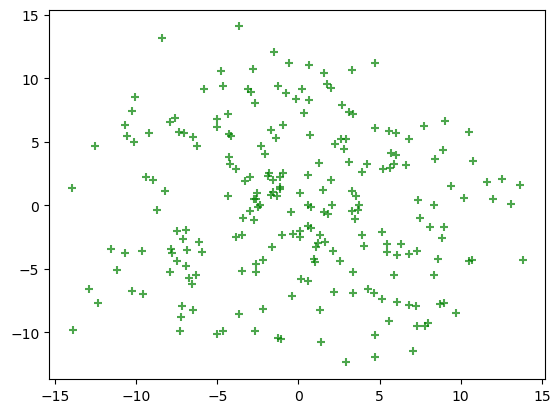

In [57]:
plt.scatter(X_abod_pca[:, 0], X_abod_pca[:, 1], marker='+', color='green', edgecolor='k', alpha=0.7)
plt.show()

### LODA (Lightweight On-line Detector of Anomalies)

It's an extension of HBOS. We calculate the score similarly to HBOS, but considering not only one feature, but many. LODA approximates the joint probability unsing a collection of one-dimensional histograms, where every one-dimensional histogram is constructed on an input space projected onto a randomly generated vector.

In [58]:
from pyod.models.loda import LODA

In [59]:
clf = LODA()
clf.fit(X)

LODA(contamination=0.1, n_bins=10, n_random_cuts=100)

In [60]:
outliers_loda = clf.predict(X)
np.unique(outliers_loda, return_counts=True)

(array([0, 1]), array([1645,  183]))

In [61]:
df_loda=df1.loc[np.where(outliers_loda==1)]
df_loda

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,16.082550,-3.120218,694.365924,0.751478,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773
8,177778,0.078308,0.002414,-0.000061,0.0,0.000031,10.454705,0.538686,-0.000031,0.000292,...,0.899003,-1.376568,777.537820,0.744768,0.216599,0.000000,0.918358,1.0,0.837659,-1.032183
11,192192,0.220184,0.003411,-0.000153,0.0,0.000061,9.174328,1.012498,0.000000,0.000771,...,-0.299090,-1.068378,758.866442,0.672754,0.259433,0.000000,0.884626,1.0,-0.386064,-0.714819
22,168168,0.214294,0.003021,0.000000,0.0,0.000000,13.307432,1.052992,0.000000,0.000498,...,2.858676,-2.126633,686.866232,0.689625,0.291078,0.000000,0.891584,1.0,1.037818,-1.382959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,184184,-0.017426,0.107068,-0.000092,0.0,0.000122,11.579971,0.004274,0.000000,0.025630,...,1.063753,-1.008865,675.932069,0.625863,0.266277,0.038539,0.847298,1.0,-0.878952,-0.394165
1809,200200,-0.253113,0.044767,-0.000305,0.0,0.000397,20.170985,0.148770,0.000000,0.007472,...,-1.494379,-0.072332,757.238044,0.643910,0.261324,0.000000,0.861301,1.0,-0.612717,-0.499374
1819,219419,-0.040253,0.037153,-0.000366,0.0,0.000488,21.708608,0.196139,0.000000,0.009914,...,-0.585684,-0.435189,840.733659,0.648714,0.275373,0.000000,0.901568,1.0,-0.757745,-0.512022
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.947101,-1.301303,634.120979,0.614458,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583


It again has 183 elements that are considered outliers, but if we go and see which they are, we can easily see that they are not the same ones.

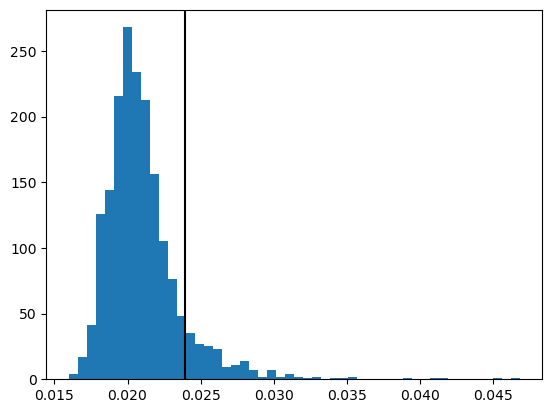

In [14]:
plt.hist(clf.decision_scores_, bins=50)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_loda==1)]), c='k')
plt.show()

In [64]:
X_loda=df_loda.values
X_loda

array([[ 1.58558000e+05,  1.45080566e-01,  4.00063526e-03, ...,
         1.00000000e+00,  6.74219030e+00, -1.70621500e+00],
       [ 1.56956000e+05,  1.49963379e-01,  5.08360509e-03, ...,
         1.00000000e+00,  1.68898567e+00, -1.02477319e+00],
       [ 1.77778000e+05,  7.83081055e-02,  2.41361103e-03, ...,
         1.00000000e+00,  8.37658981e-01, -1.03218257e+00],
       ...,
       [ 2.19419000e+05, -4.02526855e-02,  3.71525497e-02, ...,
         1.00000000e+00, -7.57745487e-01, -5.12021752e-01],
       [ 1.74575000e+05, -1.39678955e-01,  8.78793066e-03, ...,
         1.00000000e+00, -8.57759129e-01, -6.08583413e-01],
       [ 1.69770000e+05, -2.10968018e-01,  9.93321526e-03, ...,
         1.00000000e+00, -6.56631729e-01, -5.86954461e-01]])

In [65]:
scl = StandardScaler()
X_loda = scl.fit_transform(X_loda)
X_loda

array([[-0.9871936 , -0.00662973, -0.81740512, ...,  0.10684657,
         5.05771422, -1.8457541 ],
       [-1.03356242, -0.00643414, -0.78430644, ...,  0.10684657,
         1.3135728 , -0.91702479],
       [-0.43088352, -0.00930439, -0.86590915, ...,  0.10684657,
         0.68278743, -0.92712296],
       ...,
       [ 0.77438743, -0.01405351,  0.19581293, ...,  0.10684657,
        -0.49931787, -0.21820169],
       [-0.52359222, -0.01803616, -0.67109158, ...,  0.10684657,
        -0.57342237, -0.34980448],
       [-0.66266974, -0.02089174, -0.63608838, ...,  0.10684657,
        -0.42439824, -0.32032662]])

In [66]:
pca = PCA(n_components=2)
pca.fit(X_loda)
X_loda_pca = pca.transform(X_loda)
print(X_loda_pca.shape)

(183, 2)


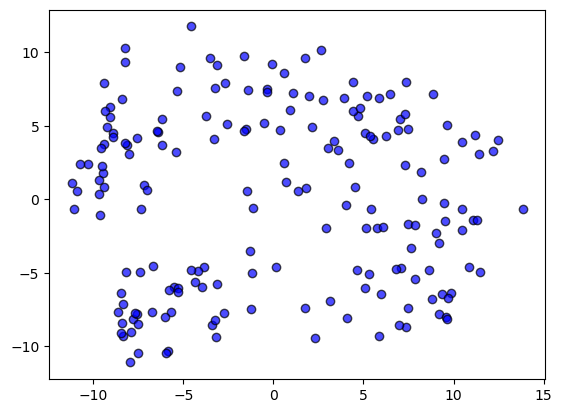

In [67]:
plt.scatter(X_loda_pca[:, 0], X_loda_pca[:, 1], marker='o', color='blue', edgecolor='k', alpha=0.7)
plt.show()

# MODEL-BASED APPROACHES

All the previous approaches were not based on a model, so each time we have to apply them to a new point, we would have to do it all again, while in this case we have a model that remains

### Isolation forest

In [34]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [35]:
#nell'isolation forest serve fare  train e test. 
#Quindi mi salvo in una variabile target le emozioni, lasciandole categoriche

In [36]:
y = np.array(df["emotion"])
np.unique(y, return_counts=True)

(array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
        'surprised'], dtype=object),
 array([280, 280, 144, 280, 280, 140, 280, 144]))

In [37]:
#faccio lo split train/test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1279, 232), (1279,), (549, 232), (549,))

In [39]:
#faccio il fit dell'isolation forest sul train
clf = IsolationForest(random_state=0)
clf.fit(X_train,y_train)

IsolationForest(random_state=0)

In [40]:
outliers = clf.predict(X_test)

In [41]:
np.unique(outliers, return_counts=True) #restituisce -1 per gli outlier, che sono 21 solo nel test set

(array([-1,  1]), array([ 21, 528]))

In [42]:
df_isfor1=df1.loc[np.where(outliers==-1)]
df_isfor1

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
6,168168,0.112335,0.004295,-0.000031,0.0,0.000031,9.780186,0.892730,0.000000,0.001048,...,0.759724,-1.248265,767.472305,0.770555,0.168296,0.217149,0.907171,1.0,0.092966,-0.685192
28,185786,2.933624,0.015065,-0.000214,0.0,0.000061,16.536425,0.554772,0.000000,0.002896,...,0.988195,-1.093331,779.302842,0.713647,0.180198,0.184469,0.844020,1.0,-0.274404,-0.371905
37,174575,0.078735,0.009290,-0.000061,0.0,0.000031,6.912075,0.341313,-0.000122,0.001235,...,-1.005966,-0.432128,636.958545,0.617208,0.224091,0.123868,0.782755,1.0,-0.827996,0.093101
46,187387,0.220184,0.004453,-0.000244,0.0,0.000092,7.778124,0.338494,0.000000,0.001207,...,-1.589529,0.002306,665.099431,0.602445,0.257904,0.079066,0.811647,1.0,-1.113730,-0.093612
58,168168,0.199707,0.011376,-0.000061,0.0,0.000000,7.644284,0.678558,0.000000,0.002703,...,2.973295,-1.735587,758.960347,0.762008,0.212324,0.000000,0.930858,1.0,1.159206,-1.143055
60,203404,1.496155,0.012444,-0.000732,0.0,0.000366,4.391836,0.310396,0.000000,0.001515,...,-0.119934,-1.032660,760.279117,0.633566,0.304314,0.000000,0.889866,1.0,-0.645909,-0.692145
67,213013,0.228149,0.014788,-0.002045,0.0,0.001099,3.349925,0.184097,0.000000,0.001760,...,-1.194296,-0.567134,770.190969,0.611263,0.333176,0.000000,0.899579,1.0,-0.862427,-0.660247
79,237037,0.137665,0.029874,-0.004791,0.0,0.003326,4.633576,0.417955,0.000000,0.004129,...,-1.435517,-0.399301,823.390486,0.591516,0.329394,0.000000,0.878594,1.0,-1.125325,-0.485650
111,190590,-0.118927,0.005987,-0.000061,0.0,0.000153,11.250705,-0.118477,0.000000,0.001354,...,3.048943,-1.963566,712.748803,0.631870,0.247597,0.008146,0.822624,1.0,-0.363002,-0.454800
137,192192,-2.469330,0.033057,-0.000244,0.0,0.000122,16.773696,0.368326,0.000000,0.007623,...,7.963262,-2.727058,861.201408,0.763476,0.172353,0.170730,0.899352,1.0,0.480593,-0.771581


In [43]:
clf = IsolationForest(random_state=0)
clf.fit(X,y)

IsolationForest(random_state=0)

In [44]:
outliers_isfor = clf.predict(X)

In [45]:
np.unique(outliers_isfor, return_counts=True) 
#restituisce -1 per gli outlier, che sono 56 facendo fit e il predict su tutto il dataset

(array([-1,  1]), array([  56, 1772]))

Per visualizzare gli outlier: faccio la PCA sul dataset, e poi plotto con come hue del colore la colonna, che mi dice se è un outlier, dato dall'isolation forest

In [35]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=2)
pca.fit(X)
X_out_pca = pca.transform(X)

In [93]:
X_out_pca.shape

(1828, 2)

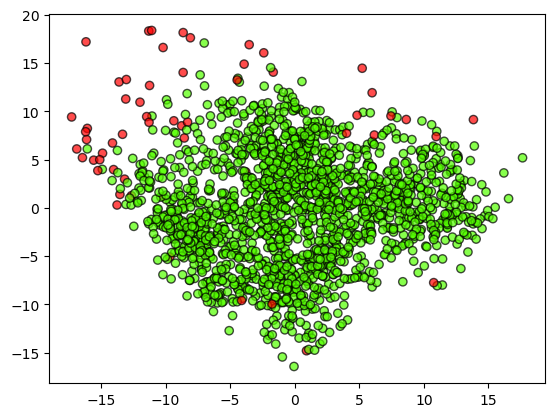

In [95]:
plt.scatter(X_out_pca[:, 0], X_out_pca[:, 1], c=outliers_isfor, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Per me, per vedere la differenza, vado a usare anche Multi Dimensional Scaling come tecnica di data reduction per plottare gli outlier

In [40]:
from sklearn.manifold import MDS

In [41]:
mds = MDS(n_components=2) #, normalized_stress='auto') # shoudl run as sammon mapping
X_out_mds = mds.fit_transform(X)
X_out_mds.shape

(1828, 2)

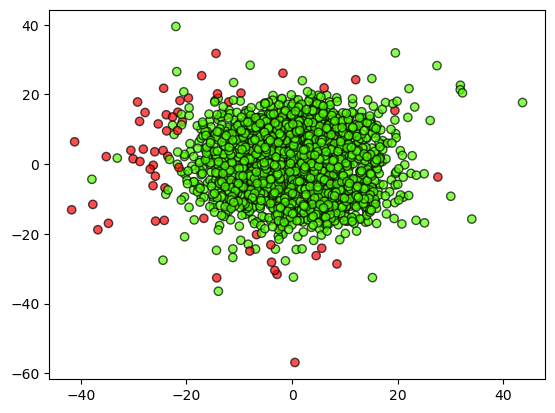

In [42]:
plt.scatter(X_out_mds[:, 0], X_out_mds[:, 1], c=outliers, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [45]:
#sarebbe interessante vedere quali sono le etichette target dei punti che vengono etichettati come outlier: 
#faccio un barplot, che mi dice per ogni valore della variabile target emotion quanti sono outlier e quanti normali

In [96]:
#creo un dataframe che così posso utilizzare per vedere solo queste caratteristiche degli outlier:
df_out=pd.DataFrame()
df_out['emotion']=df['emotion']
df_out['isout']=outliers_isfor 
df_out['isout'] = df_out['isout'].map({-1:'out',1:'not_out'})
df_out #sono 56 outlier, identificati da -1. Li plotto in 0, così ho 0 per gli out e 1 per gli inlier

,emotion,isout
0,neutral,not_out
1,neutral,not_out
2,neutral,not_out
3,neutral,not_out
4,calm,not_out
...,...,...
1823,surprised,not_out
1824,surprised,not_out
1825,surprised,not_out
1826,surprised,not_out


In [74]:
categorical_cols = ["isout"]

df_out = pd.get_dummies(df_out, columns=categorical_cols)
#X = df1.iloc[:,0:25]
df_out

,emotion,isout_not_out,isout_out
0,neutral,1,0
1,neutral,1,0
2,neutral,1,0
3,neutral,1,0
4,calm,1,0
...,...,...,...
1823,surprised,1,0
1824,surprised,1,0
1825,surprised,1,0
1826,surprised,1,0


In [76]:
count=df_out.groupby(['emotion','isout_out']).count()
count

isout_not_out
emotion   isout_out               
angry     0                    259
          1                     21
calm      0                    278
          1                      2
disgust   0                    142
          1                      2
fearful   0                    263
          1                     17
happy     0                    272
          1                      8
neutral   0                    139
          1                      1
sad       0                    275
          1                      5
surprised 0                    144

In [77]:
Em = ["angry", "calm", "disgust", "fearful", "happy",'neutral','sad','surprised']
Num_in = [259,278,142,263,272,139,275,144]
Num_out = [21,2,2,17,8,1,5,0]

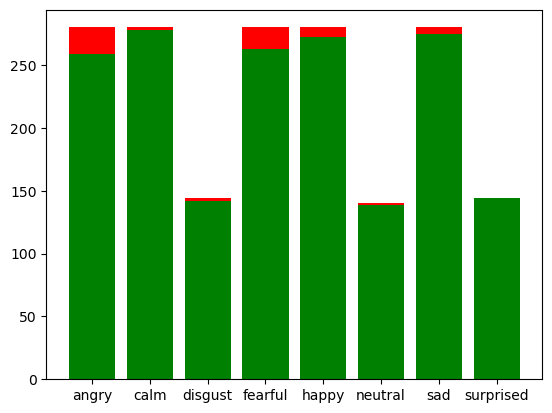

In [87]:
plt.bar(Em, Num_in,color='green')
plt.bar(Em, Num_out, bottom=Num_in,color='red')
plt.show()
#possiamo vedere come sono distribuiti gli outlier tra le varie emozioni, e di quali emozioni rileviamo un numero
#maggiore di outlier. 
#questo tipo di grafico e di rappresentazione fatti per l'isolation forest si possono fare anche per gli altri metodi,
#che è proprio quello che chiedono per il progetto, soprattutto gli scatter

In [68]:
from pyod.models.iforest import IsolationForest
#from this other library it doesn't need train and test

In [69]:
clf = IsolationForest()
clf.fit(X)

IsolationForest()

In [70]:
outliers_isfor2 = clf.predict(X)
np.unique(outliers_isfor2, return_counts=True)
#trova 48 outlier in tutto il dataset

(array([-1,  1]), array([  47, 1781]))

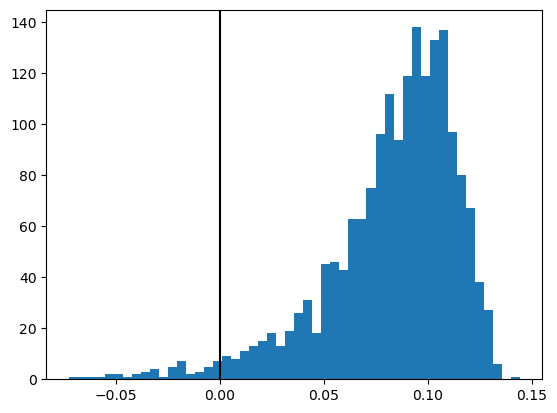

In [71]:
plt.hist(clf.decision_function(X), bins=50)
plt.axvline(np.min(clf.decision_function(X)[np.where(outliers_isfor2==1)]), c='k')
plt.show()

In [74]:
df_isfor2=df1.loc[np.where(outliers_isfor2==-1)]
df_isfor2

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,158558,0.145081,0.004001,-0.000031,0.000000,0.000000,15.028520,0.904033,0.000000,0.000511,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.000000,6.742190,-1.706215
35,213013,-9.211029,0.149701,-0.004761,0.000000,0.002960,9.819674,0.386155,0.000397,0.035097,...,-0.949363,-0.392819,660.978941,0.524586,0.276321,0.035675,0.751114,1.000000,-1.098503,0.225204
53,156956,0.147858,0.005750,0.000000,0.000000,0.000000,17.252373,1.098089,0.000000,0.000726,...,30.039185,-4.720898,717.671949,0.776701,0.175558,0.000000,0.902130,1.000000,3.302265,-1.293591
93,254655,0.952850,0.046673,-0.007965,0.000000,0.004456,6.003940,0.634918,0.000519,0.008796,...,-0.159982,0.165939,788.358837,0.525573,0.256716,0.023196,0.709219,1.000000,-0.820304,0.333225
94,238639,0.507721,0.047348,-0.008331,0.000000,0.003448,9.384395,0.492519,0.000366,0.012194,...,0.204971,0.448218,746.480442,0.531681,0.264737,0.025887,0.717791,1.000000,-0.877413,0.241350
95,249850,2.039978,0.054172,-0.009674,0.000000,0.004608,6.469003,0.530546,-0.000458,0.013697,...,1.239544,0.777736,823.747059,0.562669,0.247146,0.014651,0.742669,1.000000,-0.812968,0.216735
241,211412,7.284607,0.087604,-0.003784,0.000000,0.005402,17.961059,-0.209128,-0.002136,0.017466,...,-1.055769,-0.704379,842.395235,0.674996,0.227276,0.029732,0.856511,1.000000,-0.483418,-0.449991
243,216216,-0.476227,0.104572,-0.005585,0.000000,0.005341,10.479328,0.185127,0.001099,0.024166,...,-1.027988,-0.534073,798.595375,0.627827,0.232448,0.078238,0.809098,1.000000,-0.688100,-0.164156
249,187387,0.638611,0.073107,-0.005615,0.000000,0.006226,15.395982,-0.101212,0.012695,0.014629,...,-0.192834,-0.447262,542.033217,0.490972,0.268312,0.043688,0.681107,1.000000,-0.797924,0.508360
251,164965,-11.624939,0.059633,-0.003204,-0.000031,0.004211,11.979464,-0.586844,0.001709,0.013145,...,-0.874799,0.333009,522.986170,0.538052,0.254525,0.052703,0.712728,1.000000,-0.903101,0.298634


In [76]:
X_isfor=df_isfor2.values
X_isfor

array([[ 1.58558000e+05,  1.45080566e-01,  4.00063526e-03, ...,
         1.00000000e+00,  6.74219030e+00, -1.70621500e+00],
       [ 2.13013000e+05, -9.21102905e+00,  1.49701251e-01, ...,
         1.00000000e+00, -1.09850287e+00,  2.25204052e-01],
       [ 1.56956000e+05,  1.47857666e-01,  5.75018559e-03, ...,
         1.00000000e+00,  3.30226543e+00, -1.29359082e+00],
       ...,
       [ 2.29029000e+05, -2.32506714e+01,  9.53933879e-02, ...,
         1.00000000e+00, -3.04516558e-01, -7.51093483e-01],
       [ 2.48248000e+05, -1.31105347e+01,  8.62460850e-02, ...,
         1.00000000e+00,  1.08161030e+00, -1.06416198e+00],
       [ 2.32232000e+05, -1.37707825e+01,  9.54302461e-02, ...,
         1.00000000e+00, -4.85485652e-03, -8.59076890e-01]])

In [77]:
scl = StandardScaler()
X_isfor = scl.fit_transform(X_isfor)
X_isfor

array([[-1.42522598,  0.29003873, -1.61838743, ...,  0.21040944,
         3.15859066, -1.49879811],
       [ 0.23840716, -0.35157888,  2.52537086, ...,  0.21040944,
        -0.71287185,  0.41989943],
       [-1.47416805,  0.29022918, -1.56862983, ...,  0.21040944,
         1.46007499, -1.08889173],
       ...,
       [ 0.72770564, -1.31438095,  0.98084302, ...,  0.21040944,
        -0.32082893, -0.54996761],
       [ 1.3148577 , -0.61899681,  0.72069167, ...,  0.21040944,
         0.36359246, -0.86097405],
       [ 0.82555922, -0.66427488,  0.98189128, ...,  0.21040944,
        -0.17286637, -0.65723977]])

In [78]:
pca = PCA(n_components=2)
pca.fit(X_isfor)
X_isfor_pca = pca.transform(X_isfor)
print(X_isfor_pca.shape)

(47, 2)


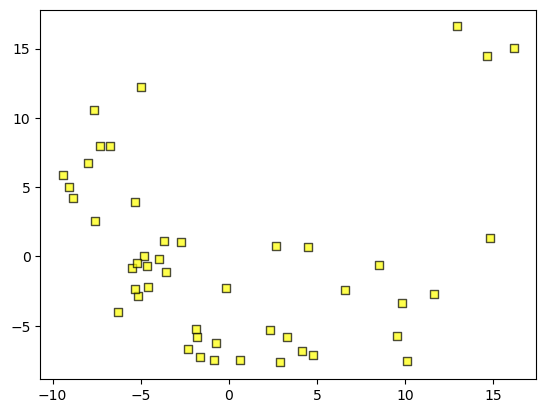

In [79]:
plt.scatter(X_isfor_pca[:, 0], X_isfor_pca[:, 1], marker='s', color='yellow', edgecolor='k', alpha=0.7)
plt.show()

## Statistical Approach - direi che possiamo evitarlo e metterne altri

Uses the probabilistic def of outlier (object with low prob with respect to a probabilty distribution model of the data). It usually assumes a parametric mdoel describing the distribution of the data. <br/>
Il prof ha detto che di solito non li useremo perchè permettono di considerare un solo attributo alla volta

### Grubb's Test

Detects outliers in univariate data, assumes the data comes from normal distribution -- detects one outlier at a time, removes it and repeats

In [106]:
from scipy import stats

### Likelihood approach

## Gestione outlier

Direi che una volta scelti quali metodi, di creare un nuovo dataframe tale che: copiamo il df1, aggiungiamo tante colonne quanti i metodi che prendiamo in considerazione, con come colonne le etichette che dicono se è outlier oppure no per quel determinato metodo. Facciamo un encoding in 0/ 1 oppure in non out/ out; creiamo così poi un filtro (maschera) che ci permette di vedere solo le righe che sono outlier per diversi metodi. <br/> <br/>
Faccio adesso la prova con isolation forest, LOF e ABOD

In [83]:
df2=copy.deepcopy(df1)

df2['loda']=outliers_loda
df2['loda'] = df2['loda'].map({1:'out',0:'not_out'})

df2['isfor']=outliers_isfor2
df2['isfor'] = df2['isfor'].map({-1:'out',1:'not_out'})

df2['lof']=outliers_lof
df2['lof'] = df2['lof'].map({1:'out',0:'not_out'})

df2['abod']=outliers_abod
df2['abod'] = df2['abod'].map({1:'out',0:'not_out'})

df2

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,loda,isfor,lof,abod
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215,out,out,out,out
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495,not_out,not_out,not_out,not_out
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773,out,not_out,not_out,not_out
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871,not_out,not_out,not_out,out
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782,not_out,not_out,not_out,not_out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814,not_out,not_out,not_out,not_out
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583,out,not_out,not_out,not_out
1825,169770,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,...,0.288322,0.000000,0.891486,1.0,-0.656632,-0.586954,out,not_out,not_out,out
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045,not_out,not_out,not_out,not_out


In [84]:
df2[(df2['lof']=='out') & (df2['isfor']=='out') & (df2['abod']=='out') & (df2['loda']=='out')]

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,loda,isfor,lof,abod
0,158558,0.145081,0.004001,-0.000031,0.000000,0.000000,15.028520,0.904033,0.000000,0.000511,...,0.155455,0.000000,0.896606,1.000000,6.742190,-1.706215,out,out,out,out
35,213013,-9.211029,0.149701,-0.004761,0.000000,0.002960,9.819674,0.386155,0.000397,0.035097,...,0.276321,0.035675,0.751114,1.000000,-1.098503,0.225204,out,out,out,out
241,211412,7.284607,0.087604,-0.003784,0.000000,0.005402,17.961059,-0.209128,-0.002136,0.017466,...,0.227276,0.029732,0.856511,1.000000,-0.483418,-0.449991,out,out,out,out
243,216216,-0.476227,0.104572,-0.005585,0.000000,0.005341,10.479328,0.185127,0.001099,0.024166,...,0.232448,0.078238,0.809098,1.000000,-0.688100,-0.164156,out,out,out,out
249,187387,0.638611,0.073107,-0.005615,0.000000,0.006226,15.395982,-0.101212,0.012695,0.014629,...,0.268312,0.043688,0.681107,1.000000,-0.797924,0.508360,out,out,out,out
251,164965,-11.624939,0.059633,-0.003204,-0.000031,0.004211,11.979464,-0.586844,0.001709,0.013145,...,0.254525,0.052703,0.712728,1.000000,-0.903101,0.298634,out,out,out,out
287,230630,-0.657318,0.058079,-0.010895,0.000000,0.011963,8.226003,0.108203,0.000244,0.011830,...,0.282723,0.016726,0.728400,1.000000,-1.023853,0.276284,out,out,out,out
292,224224,-0.789032,0.043296,-0.009827,0.000000,0.010529,5.529125,0.144689,0.007233,0.005393,...,0.302186,0.007145,0.959539,1.000000,0.265560,-1.229529,out,out,out,out
294,227427,0.903595,0.036237,-0.004578,0.000000,0.006195,5.387457,-0.110462,-0.004791,0.005138,...,0.333794,0.005586,0.963431,1.000000,-0.783417,-0.857057,out,out,out,out
308,198598,-0.448944,0.039776,-0.008423,0.000183,0.008080,7.137388,-0.033020,-0.003021,0.006943,...,0.260384,0.025929,0.855090,1.000000,-0.968199,-0.275843,out,out,out,out


Questi sarebbero i punti che vengono considerati come outlier da tutti e 4 i metodi 

Vado a trovare tutti i punti che sono outlier in almeno 3 su 4 metodi: <br/>
come è possibile vedere, ci sono 74 punti che sono considerati outlier da almeno 3 metodi su 4, che corrispondono al 4% del dataset, che è una percentuale che consideriamo troppo alta da eliminare. Quello che faremo è quindi considerare come veri outlier solamente i punti che sono considerati outlier da tutti e quattro i metodi considerati, che sono 26, e corrispondono all'1.4%. Decidiamo di trattarli eliminandoli.

In [85]:
df2[((df2['lof']=='out') & (df2['isfor']=='out') & (df2['abod']=='out'))|
    ((df2['loda']=='out') & (df2['isfor']=='out') & (df2['abod']=='out')) |
    ((df2['lof']=='out') & (df2['loda']=='out') & (df2['abod']=='out'))|
    ((df2['lof']=='out') & (df2['loda']=='out') & (df2['isfor']=='out'))|
    ((df2['loda']=='out') & (df2['isfor']=='out') & (df2['abod']=='out')) |
    ((df2['loda']=='out') & (df2['isfor']=='out') & (df2['abod']=='out') & (df2['lof']=='out'))]


,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,loda,isfor,lof,abod
0,158558,0.145081,0.004001,-0.000031,0.000000,0.000000,15.028520,0.904033,0.000000,0.000511,...,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215,out,out,out,out
8,177778,0.078308,0.002414,-0.000061,0.000000,0.000031,10.454705,0.538686,-0.000031,0.000292,...,0.216599,0.000000,0.918358,1.0,0.837659,-1.032183,out,not_out,out,out
33,209810,0.513947,0.053758,-0.004761,0.000000,0.004120,13.823620,0.558830,0.000671,0.012328,...,0.281998,0.032673,0.620003,1.0,-0.677069,0.674907,out,not_out,out,out
35,213013,-9.211029,0.149701,-0.004761,0.000000,0.002960,9.819674,0.386155,0.000397,0.035097,...,0.276321,0.035675,0.751114,1.0,-1.098503,0.225204,out,out,out,out
40,240240,-0.239532,0.031093,-0.001160,0.000000,0.001007,19.281083,0.252996,-0.000397,0.005075,...,0.273229,0.056354,0.740017,1.0,-1.072617,0.272193,out,not_out,out,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,232232,-13.770782,0.095430,-0.006409,0.000031,0.007019,9.588304,0.030280,-0.000122,0.016613,...,0.120879,0.423643,0.980752,1.0,-0.004855,-0.859077,out,out,out,out
1765,211411,-26.329529,0.038981,-0.001587,0.000000,0.002258,13.246855,-0.951295,-0.000397,0.003636,...,0.301387,0.024696,0.736794,1.0,-1.174018,0.378637,out,not_out,out,out
1766,217818,119.245300,0.041684,-0.002472,0.000061,0.006165,14.962778,-0.678768,-0.000244,0.006387,...,0.210014,0.120164,0.975000,1.0,0.869672,-1.289727,out,not_out,out,out
1801,180981,0.072052,0.125725,-0.000061,0.000000,0.000061,10.136054,0.050950,0.000000,0.028698,...,0.242829,0.129906,0.704010,1.0,-0.818179,0.518875,out,not_out,out,out


In [86]:
indextodrop=df2[(df2['lof']=='out') & (df2['isfor']=='out') & (df2['abod']=='out') & (df2['loda']=='out')].index
indextodrop

Int64Index([   0,   35,  241,  243,  249,  251,  287,  292,  294,  308,  309,
             311,  382,  554,  563,  589,  614,  656,  657,  853, 1031, 1283,
            1505, 1702, 1703, 1704, 1738, 1752, 1756, 1757, 1759],
           dtype='int64')

In [87]:
df3=copy.deepcopy(df2)
df3

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,loda,isfor,lof,abod
0,158558,0.145081,0.004001,-0.000031,0.0,0.000000,15.028520,0.904033,0.000000,0.000511,...,0.155455,0.000000,0.896606,1.0,6.742190,-1.706215,out,out,out,out
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495,not_out,not_out,not_out,not_out
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773,out,not_out,not_out,not_out
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871,not_out,not_out,not_out,out
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782,not_out,not_out,not_out,not_out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814,not_out,not_out,not_out,not_out
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583,out,not_out,not_out,not_out
1825,169770,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,...,0.288322,0.000000,0.891486,1.0,-0.656632,-0.586954,out,not_out,not_out,out
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045,not_out,not_out,not_out,not_out


In [88]:
df3.drop(indextodrop, inplace=True)
df3

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,loda,isfor,lof,abod
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495,not_out,not_out,not_out,not_out
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773,out,not_out,not_out,not_out
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871,not_out,not_out,not_out,out
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782,not_out,not_out,not_out,not_out
5,172972,0.140289,0.003085,-0.000031,0.0,0.000000,19.658058,0.763073,0.000000,0.000383,...,0.214988,0.000000,0.905741,1.0,1.823902,-1.241961,not_out,not_out,not_out,not_out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814,not_out,not_out,not_out,not_out
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583,out,not_out,not_out,not_out
1825,169770,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,...,0.288322,0.000000,0.891486,1.0,-0.656632,-0.586954,out,not_out,not_out,out
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045,not_out,not_out,not_out,not_out


La nuova dimensione del dataframe è 1803 x 236 --> abbiamo eliminato 26 righe (quelle degli outlier). <br/>
Vado a salvare questo dataframe, e lo salvo nella nostra cartella Datasets

In [43]:
##eseguire una volta sola -- già eseguito
#df3.to_csv("../../Datasets/ravdess_features_dm2/Dataset_no_outliers_TRAIN.csv")

METODI CHE SCEGLIAMO per il confronto: 
- HBOS
- LOF
- ABOD
- ISOLATION FOREST

MA aggiungere una tabellina che dice di ogni metodo quanti ne trova (così per far vedere quanti ogni algoritmo ne trova). NOTA: ok il contamination parameter a 0.1 per ogni algoritmo, ma quelli che poi noi dobbiamo decidere come trattare è il top 1% di outlier --> circa 18 outlier (1% di 1830 record). Quindi faremo i 4 metodi, e vediamo quanti ne vengono fuori vedendo quali sono out per tutto e dobbiamo ricavare una ventina di record da eliminare. <br/>



In [93]:
#Salvo in un dataframe ancora diverso, per poterli plottare, i punti che non venogno considerati outlier da nessuno
#dei metodi, per poterli aggiungere allo scaatterplot generico
indextokeep=df2[(df2['lof']=='not_out') & (df2['isfor']=='not_out') & (df2['abod']=='not_out') & (df2['loda']=='not_out')].index
indextokeep


Int64Index([   1,    4,    5,    6,    7,    9,   10,   12,   13,   14,
            ...
            1811, 1813, 1814, 1815, 1820, 1821, 1822, 1823, 1826, 1827],
           dtype='int64', length=1496)

In [99]:
df_punti=df2.loc[indextokeep]
df_punti

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,loda,isfor,lof,abod
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495,not_out,not_out,not_out,not_out
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782,not_out,not_out,not_out,not_out
5,172972,0.140289,0.003085,-0.000031,0.0,0.000000,19.658058,0.763073,0.000000,0.000383,...,0.214988,0.000000,0.905741,1.0,1.823902,-1.241961,not_out,not_out,not_out,not_out
6,168168,0.112335,0.004295,-0.000031,0.0,0.000031,9.780186,0.892730,0.000000,0.001048,...,0.168296,0.217149,0.907171,1.0,0.092966,-0.685192,not_out,not_out,not_out,not_out
7,166567,0.101654,0.004514,-0.000031,0.0,0.000031,11.501726,1.032849,0.000000,0.000761,...,0.166958,0.228614,0.878932,1.0,-0.171649,-0.448875,not_out,not_out,not_out,not_out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,168168,-0.097290,0.005616,0.000000,0.0,0.000031,6.413640,-0.454362,0.000000,0.000914,...,0.226786,0.000000,0.919408,1.0,2.419242,-1.468288,not_out,not_out,not_out,not_out
1822,168168,-0.107788,0.008610,-0.000031,0.0,0.000122,6.901624,0.058786,0.000000,0.002578,...,0.222296,0.042880,0.868196,1.0,0.273467,-0.817218,not_out,not_out,not_out,not_out
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814,not_out,not_out,not_out,not_out
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045,not_out,not_out,not_out,not_out


In [100]:
#Da questo dataframe, per poterlo usare per plottare i punti devo rimuovere le variabili categoriche, che la PCA non
#saprebbe come trattare
df_punti=df_punti.drop('loda',axis=1)
df_punti=df_punti.drop('isfor',axis=1)
df_punti=df_punti.drop('abod',axis=1)
df_punti=df_punti.drop('lof',axis=1)

df_punti

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,-0.096686,-1.100390,705.975006,0.744699,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.054656,-1.071109,741.412796,0.744390,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782
5,172972,0.140289,0.003085,-0.000031,0.0,0.000000,19.658058,0.763073,0.000000,0.000383,...,1.573901,-1.512306,755.905381,0.741084,0.214988,0.000000,0.905741,1.0,1.823902,-1.241961
6,168168,0.112335,0.004295,-0.000031,0.0,0.000031,9.780186,0.892730,0.000000,0.001048,...,0.759724,-1.248265,767.472305,0.770555,0.168296,0.217149,0.907171,1.0,0.092966,-0.685192
7,166567,0.101654,0.004514,-0.000031,0.0,0.000031,11.501726,1.032849,0.000000,0.000761,...,1.390208,-1.335427,736.101217,0.748070,0.166958,0.228614,0.878932,1.0,-0.171649,-0.448875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,168168,-0.097290,0.005616,0.000000,0.0,0.000031,6.413640,-0.454362,0.000000,0.000914,...,6.087876,-2.323779,743.744996,0.746732,0.226786,0.000000,0.919408,1.0,2.419242,-1.468288
1822,168168,-0.107788,0.008610,-0.000031,0.0,0.000122,6.901624,0.058786,0.000000,0.002578,...,-0.106695,-1.001820,700.093841,0.702905,0.222296,0.042880,0.868196,1.0,0.273467,-0.817218
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.904699,-1.472070,660.790616,0.663444,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,-0.020476,-1.160818,680.117724,0.622818,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045


In [101]:
X_punti=df_punti.values
X_punti

array([[ 1.60160000e+05,  1.14318848e-01,  4.28334118e-03, ...,
         1.00000000e+00, -7.00420243e-01, -2.01495219e-01],
       [ 1.69769000e+05,  1.37664795e-01,  2.95634480e-03, ...,
         1.00000000e+00,  1.26534690e-01, -6.20781607e-01],
       [ 1.72972000e+05,  1.40289307e-01,  3.08472695e-03, ...,
         1.00000000e+00,  1.82390203e+00, -1.24196147e+00],
       ...,
       [ 1.68168000e+05, -1.54479980e-01,  5.39855181e-03, ...,
         1.00000000e+00,  2.62900185e-01, -1.05181391e+00],
       [ 1.85786000e+05, -8.58764648e-02,  1.22208885e-02, ...,
         1.00000000e+00, -4.99022442e-01, -8.49044813e-01],
       [ 1.74574000e+05, -1.95312500e-01,  9.65934941e-03, ...,
         1.00000000e+00, -9.62942936e-01, -2.76516568e-01]])

In [102]:
scl = StandardScaler()
X_punti = scl.fit_transform(X_punti)
X_punti

array([[-1.24663513,  0.06932007, -0.8060948 , ...,  0.        ,
        -0.11653837,  0.51090863],
       [-0.90429336,  0.07802446, -0.88636807, ...,  0.        ,
         1.25137587, -0.62997471],
       [-0.79017944,  0.07900299, -0.87860192, ...,  0.        ,
         4.0590899 , -2.32021263],
       ...,
       [-0.96133251, -0.03089981, -0.73863296, ...,  0.        ,
         1.47694597, -1.80281883],
       [-0.33365249, -0.00532144, -0.32593302, ...,  0.        ,
         0.21660544, -1.25108165],
       [-0.73310467, -0.04612395, -0.48088683, ...,  0.        ,
        -0.55079242,  0.30677463]])

In [104]:
pca = PCA(n_components=2)
pca.fit(X_punti)
X_punti_pca = pca.transform(X_punti)
print(X_punti_pca.shape)

(1496, 2)


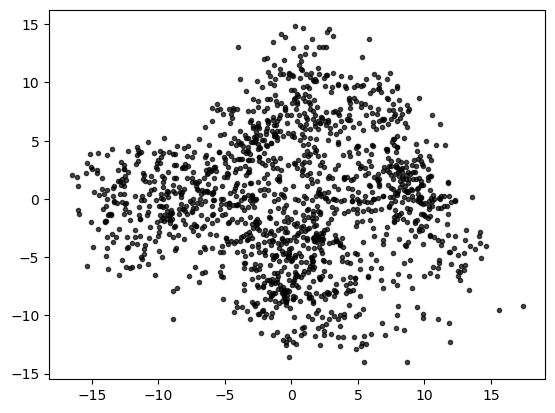

In [105]:
plt.scatter(X_punti_pca[:, 0], X_punti_pca[:, 1], marker='.', color='black', edgecolor='k', alpha=0.7)
plt.show()

Provo a plottare nello stesso grafico, con marker diversi gli outlier dei diversi metodi:

/var/folders/q8/kft2ssqs16q86dkk4gf4n3100000gn/T/ipykernel_1576/1164346705.py:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_abod_pca[:, 0], X_abod_pca[:, 1], marker='x', color='green', edgecolor='k', alpha=0.7, label='ABOD outliers')


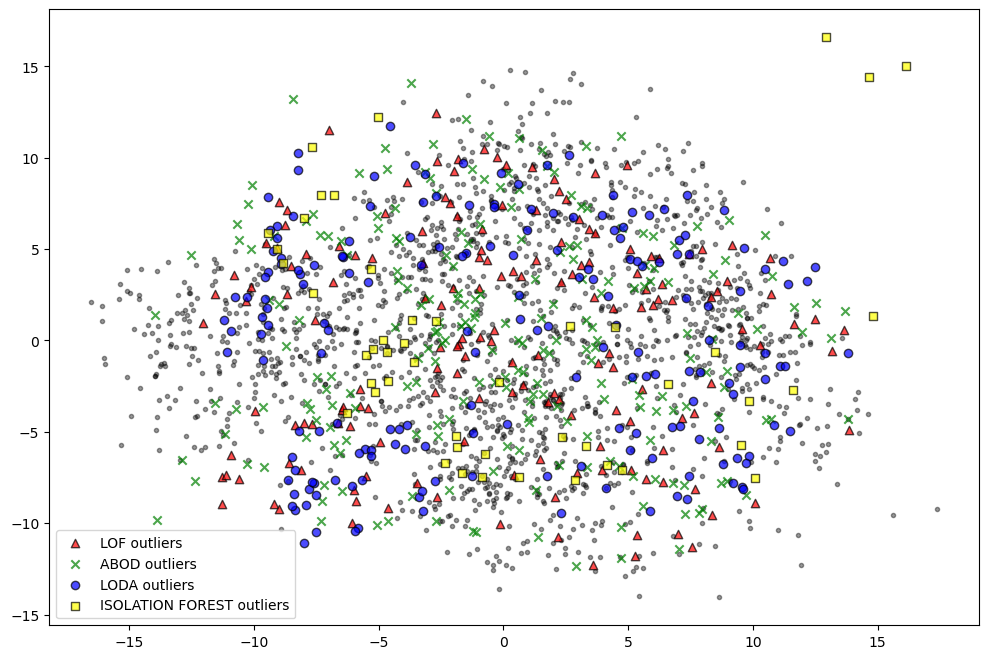

In [117]:
plt.figure(figsize=(12,8))

plt.scatter(X_punti_pca[:, 0], X_punti_pca[:, 1], marker='.', color='black', edgecolor='k', alpha=0.4)
plt.scatter(X_lof_pca[:, 0], X_lof_pca[:, 1], marker='^', color='red', edgecolor='k', alpha=0.7, label='LOF outliers')
plt.scatter(X_abod_pca[:, 0], X_abod_pca[:, 1], marker='x', color='green', edgecolor='k', alpha=0.7, label='ABOD outliers')
plt.scatter(X_loda_pca[:, 0], X_loda_pca[:, 1], marker='o', color='blue', edgecolor='k', alpha=0.7, label='LODA outliers')
plt.scatter(X_isfor_pca[:, 0], X_isfor_pca[:, 1], marker='s', color='yellow', edgecolor='k', alpha=0.7, label='ISOLATION FOREST outliers')

plt.legend()
plt.show()


Oltre a questo plotto anche quali sono i dati che ho eliminato insieme a quelli che ho lasciato, per far vedere quali sono i punti che ho eliminato

In [119]:
df_solo_out=df2.loc[indextodrop]
df_solo_out=df_solo_out.drop('loda', axis=1)
df_solo_out=df_solo_out.drop('abod', axis=1)
df_solo_out=df_solo_out.drop('isfor', axis=1)
df_solo_out=df_solo_out.drop('lof', axis=1)

df_solo_out

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,158558,0.145081,0.004001,-0.000031,0.000000,0.000000,15.028520,0.904033,0.000000,0.000511,...,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,0.896606,1.000000,6.742190,-1.706215
35,213013,-9.211029,0.149701,-0.004761,0.000000,0.002960,9.819674,0.386155,0.000397,0.035097,...,-0.949363,-0.392819,660.978941,0.524586,0.276321,0.035675,0.751114,1.000000,-1.098503,0.225204
241,211412,7.284607,0.087604,-0.003784,0.000000,0.005402,17.961059,-0.209128,-0.002136,0.017466,...,-1.055769,-0.704379,842.395235,0.674996,0.227276,0.029732,0.856511,1.000000,-0.483418,-0.449991
243,216216,-0.476227,0.104572,-0.005585,0.000000,0.005341,10.479328,0.185127,0.001099,0.024166,...,-1.027988,-0.534073,798.595375,0.627827,0.232448,0.078238,0.809098,1.000000,-0.688100,-0.164156
249,187387,0.638611,0.073107,-0.005615,0.000000,0.006226,15.395982,-0.101212,0.012695,0.014629,...,-0.192834,-0.447262,542.033217,0.490972,0.268312,0.043688,0.681107,1.000000,-0.797924,0.508360
251,164965,-11.624939,0.059633,-0.003204,-0.000031,0.004211,11.979464,-0.586844,0.001709,0.013145,...,-0.874799,0.333009,522.986170,0.538052,0.254525,0.052703,0.712728,1.000000,-0.903101,0.298634
287,230630,-0.657318,0.058079,-0.010895,0.000000,0.011963,8.226003,0.108203,0.000244,0.011830,...,-0.602150,0.445050,682.184004,0.503086,0.282723,0.016726,0.728400,1.000000,-1.023853,0.276284
292,224224,-0.789032,0.043296,-0.009827,0.000000,0.010529,5.529125,0.144689,0.007233,0.005393,...,0.198374,0.964198,960.293330,0.727495,0.302186,0.007145,0.959539,1.000000,0.265560,-1.229529
294,227427,0.903595,0.036237,-0.004578,0.000000,0.006195,5.387457,-0.110462,-0.004791,0.005138,...,1.006886,1.328188,922.406169,0.686314,0.333794,0.005586,0.963431,1.000000,-0.783417,-0.857057
308,198598,-0.448944,0.039776,-0.008423,0.000183,0.008080,7.137388,-0.033020,-0.003021,0.006943,...,-0.389714,0.555815,735.171122,0.631590,0.260384,0.025929,0.855090,1.000000,-0.968199,-0.275843


In [120]:
X_solo_out=df_solo_out.values
X_solo_out

scl = StandardScaler()
X_solo_out = scl.fit_transform(X_solo_out)

pca = PCA(n_components=2)
pca.fit(X_solo_out)
X_solo_out_pca = pca.transform(X_solo_out)
print(X_solo_out_pca.shape)


(31, 2)


In [126]:
df_rimasti=copy.deepcopy(df3)
df_rimasti=df_rimasti.drop('loda', axis=1)
df_rimasti=df_rimasti.drop('lof', axis=1)
df_rimasti=df_rimasti.drop('isfor', axis=1)
df_rimasti=df_rimasti.drop('abod', axis=1)

df_rimasti

,frame_count,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_std,...,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
1,160160,0.114319,0.004283,-0.000031,0.0,0.000000,16.488415,1.001578,0.000000,0.000540,...,-0.096686,-1.100390,705.975006,0.744699,0.163183,0.270133,0.874713,1.0,-0.700420,-0.201495
2,156956,0.149963,0.005084,0.000000,0.0,0.000000,17.035218,1.269509,-0.000061,0.000873,...,16.082550,-3.120218,694.365924,0.751478,0.190634,0.000000,0.899156,1.0,1.688986,-1.024773
3,152152,0.139618,0.004886,-0.000031,0.0,0.000000,21.824521,1.799676,-0.000031,0.000907,...,-0.332682,-0.880988,663.205667,0.736895,0.182551,0.205616,0.886474,1.0,-0.594111,-0.412871
4,169769,0.137665,0.002956,-0.000031,0.0,0.000000,13.236022,0.619367,-0.000031,0.000397,...,0.054656,-1.071109,741.412796,0.744390,0.177069,0.177847,0.878014,1.0,0.126535,-0.620782
5,172972,0.140289,0.003085,-0.000031,0.0,0.000000,19.658058,0.763073,0.000000,0.000383,...,1.573901,-1.512306,755.905381,0.741084,0.214988,0.000000,0.905741,1.0,1.823902,-1.241961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,168168,-0.154480,0.005399,0.000000,0.0,0.000031,6.504521,-0.437772,0.000000,0.001333,...,0.904699,-1.472070,660.790616,0.663444,0.294603,0.000000,0.893268,1.0,0.262900,-1.051814
1824,174575,-0.139679,0.008788,-0.000031,0.0,0.000031,9.706586,-0.079604,0.000000,0.002307,...,0.947101,-1.301303,634.120979,0.614458,0.323299,0.000000,0.900089,1.0,-0.857759,-0.608583
1825,169770,-0.210968,0.009933,0.000000,0.0,0.000031,5.874582,-0.026582,0.000000,0.001970,...,2.505409,-1.472613,631.801688,0.634339,0.288322,0.000000,0.891486,1.0,-0.656632,-0.586954
1826,185786,-0.085876,0.012221,-0.000031,0.0,0.000092,4.482247,-0.106998,0.000000,0.004435,...,-0.020476,-1.160818,680.117724,0.622818,0.323022,0.000000,0.869563,1.0,-0.499022,-0.849045


In [127]:
X_rimasti=df_rimasti.values

scl = StandardScaler()
X_rimasti = scl.fit_transform(X_rimasti)

pca = PCA(n_components=2)
pca.fit(X_rimasti)
X_rimasti_pca = pca.transform(X_rimasti)
print(X_rimasti_pca.shape)

(1797, 2)


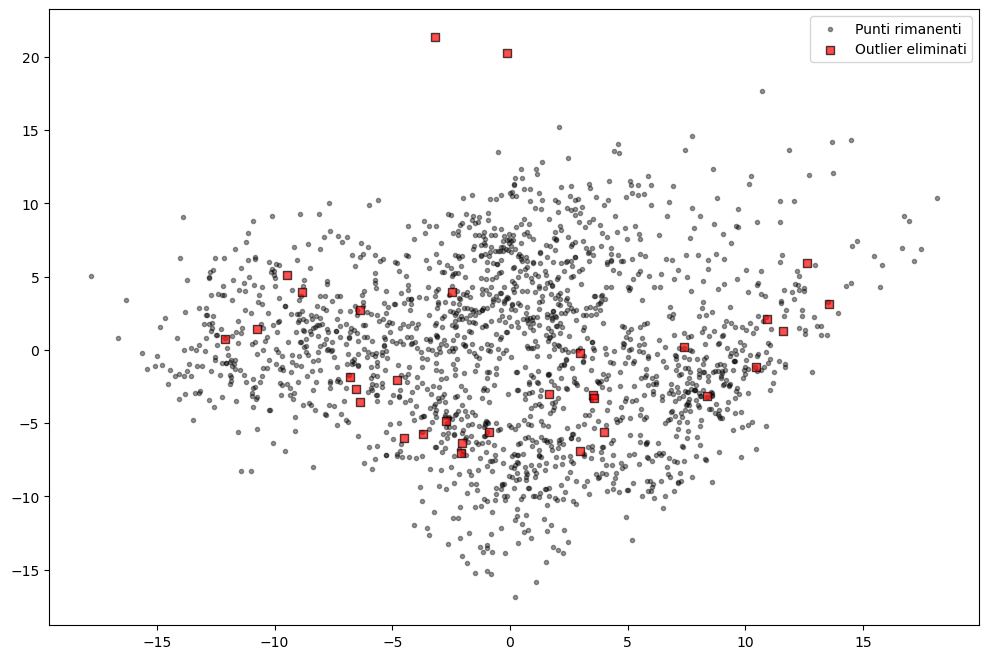

In [130]:
plt.figure(figsize=(12,8))

plt.scatter(X_rimasti_pca[:, 0], X_rimasti_pca[:, 1], marker='.', color='black', edgecolor='k', alpha=0.4, label='Punti rimanenti')
plt.scatter(X_solo_out_pca[:, 0], X_solo_out_pca[:, 1], marker='s', color=''#0f0f0f', edgecolor='k', alpha=0.7, label='Outlier eliminati')

plt.legend()
plt.show()
